<a href="https://colab.research.google.com/github/Hailemicael/NLP_Project/blob/master/nlp_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia-api

In [ ]:
# Import libraries for our project
import pandas as pd
import wikipediaapi
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Set up wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('NLP_Project(hailelulseged281913@gmail.com)', 'en')


In [ ]:
# List of medical and non-medical keywords
medical_keywords = ["Medicine", "Cardiology", "Surgery", "Health", "Pharmacy", "Immunology",
                    "Pathology", "Pediatrics", "Oncology", "Neurology", "Dentistry", "vascular",
                    "orthopedic", "dermatology", "endocrinology", "gastroenterology", "pulmonary", "neurosurgery",
                    "ophthalmology", "radiology", "anesthesiology", "genetics", "oncologist", "hematology",
                    "immunotherapy", "pediatrician", "psychiatry", "dentist", "Anatomy",
                    "Physiology", "Biochemistry", "balanced diet", "Ailment", "Affliction", "Illness", "Sickness",
                    "Hereditary", "Infectious", "Pandemic", "nurse", "Doctor", "Alzheimer", "virus", "surgery"]

non_medical_keywords = ["Art", "Literature", "Philosophy", "Science", "Technology", "Space",
                        "Environment", "Food", "Cuisine", "Recipes", "Cooking", "History", "Ancient_Civilizations",
                        "Archaeology", "painting", "sculpture", "literary", "fiction", "poetry", "philosopher",
                        "culinary", "gastronomy", "recipe", "culinary", "history", "historical", "architectural",
                        "archaeological", "civilization", "culture", "Engineering", "Astronomy", "Cosmology", "country", "Industry", "ocean", "charger", "battery", "music", "dance", "painting", "sculpture", "artistic", "novel"]


In [ ]:
# Function to fetch content from Wikipedia using wikipediaapi
def fetch_content(title, wiki_wiki):
    # Fetches content from Wikipedia for a given title.
    page_py = wiki_wiki.page(title)
    content = page_py.text

    return content

# Fetch content for medical keywords
medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in medical_keywords]
# print("Fetched content for medical keywords:")
# print(medical_content_list)
# Fetch content for non-medical keywords
non_medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in non_medical_keywords]
# print("Fetched content for non-medical keywords:")
# print(non_medical_content_list)

In [ ]:
# Function to fetch content from Wikipedia using wikipediaapi
def fetch_content(title, wiki_wiki):
    # Fetches content from Wikipedia for a given title.
    page_py = wiki_wiki.page(title)
    content = page_py.text

    # Clean the content
    cleaned_content = clean_text(content)

    return cleaned_content




In [ ]:
# Function to clean text (remove HTML tags, references, etc.)
def clean_text(text):
    # Remove HTML tags and comments
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text(separator=" ")

    # Remove special characters and non-alphabetic characters
    clean_text = re.sub(r"[^a-zA-Z\s]", "", clean_text)

    # Tokenize the text
    tokens = word_tokenize(clean_text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove extra whitespaces
    clean_text = " ".join(tokens)

    return clean_text
# Clean medical content
cleaned_medical_content_list = [clean_text(content) for content in medical_content_list]
# print("Text cleaning applied to medical content:")
# print(cleaned_medical_content_list)
# Clean non-medical content
cleaned_non_medical_content_list = [clean_text(content) for content in non_medical_content_list]
# print("Text cleaning applied to non-medical content:")
# print(cleaned_non_medical_content_list)


In [ ]:
# Create a DataFrame with the fetched and cleaned data
medical_data = {"text": cleaned_medical_content_list, "label": ["medical"] * len(cleaned_medical_content_list)}
non_medical_data = {"text": cleaned_non_medical_content_list, "label": ["non-medical"] * len(cleaned_non_medical_content_list)}

df_medical = pd.DataFrame(medical_data)
df_non_medical = pd.DataFrame(non_medical_data)
# Concatenate the dataframes and shuffle rows
df = pd.concat([df_medical, df_non_medical], ignore_index=True).sample(frac=1)



In [ ]:
# Check the updated dataset
print("Updated Dataset:")
print(df)
df.to_csv('medical_non_medical_dataset.csv', index=False)
print("Dataset saved as 'medical_non_medical_dataset'")


Updated Dataset:
                                                 text        label
79  world ocean sea body salt water cover earth en...  non-medical
73  culture kulchr concept encompasses social beha...  non-medical
83  dance art form often classified sport consisti...  non-medical
54  cooking also known cookery professionally culi...  non-medical
59  sculpture branch visual art operates three dim...  non-medical
..                                                ...          ...
66  recipe set instruction describes prepare make ...  non-medical
53  recipe set instruction describes prepare make ...  non-medical
44  art diverse range human activity resulting pro...  non-medical
0   medicine science practice caring patient manag...      medical
41  alzheimers disease ad neurodegenerative diseas...      medical

[88 rows x 2 columns]
Dataset saved as 'medical_non_medical_dataset'


# Model training using Naive_bayes


In [1]:
## Model training using naive_bayes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
df = pd.read_csv('medical_non_medical_dataset.csv')

# Check class distribution
print("Original Data Distribution:")
print(df['label'].value_counts())


Original Data Distribution:
non-medical    44
medical        44
Name: label, dtype: int64


In [2]:
# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=100)

# Further split X_temp and y_temp into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.4, random_state=100)

# Handle missing values in X_train, X_val, and X_test
X_train = X_train.fillna('')
X_val = X_val.fillna('')
X_temp = X_temp.fillna('')


In [3]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_temp_tfidf = tfidf_vectorizer.transform(X_temp)


In [4]:
# Resampling using SMOTE
sampler = SMOTE(sampling_strategy='auto', k_neighbors=min(5, len(y_train) - 1))
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_tfidf, y_train)


In [5]:
# Model Selection and Training (Naive Bayes)
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)


MultinomialNB()

In [6]:
# Model Evaluation on Validation Set with Misclassification Analysis
val_predictions = nb_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"\nValidation Accuracy: {val_accuracy}")
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))



Validation Accuracy: 0.9090909090909091
Validation Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.86      0.92         7
 non-medical       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.91        11
weighted avg       0.93      0.91      0.91        11



In [8]:
# Analyze Misclassifications on Validation Set
misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_val, val_predictions)) if true_label != pred_label]
misclassified_examples = X_val.iloc[misclassified_indices].tolist()
true_labels = y_val.iloc[misclassified_indices].tolist()
pred_labels = val_predictions[misclassified_indices]

# print("\nMisclassified Examples on Validation Set:")
# for text, true_label, pred_label in zip(misclassified_examples, true_labels, pred_labels):
#     print(f"Text: {text} - True Label: {true_label} - Predicted Label: {pred_label}")

In [9]:
# Learning Curve for Overfitting/Underfitting Check
train_sizes, train_scores, test_scores = learning_curve(nb_model, X_temp_tfidf, y_temp, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')


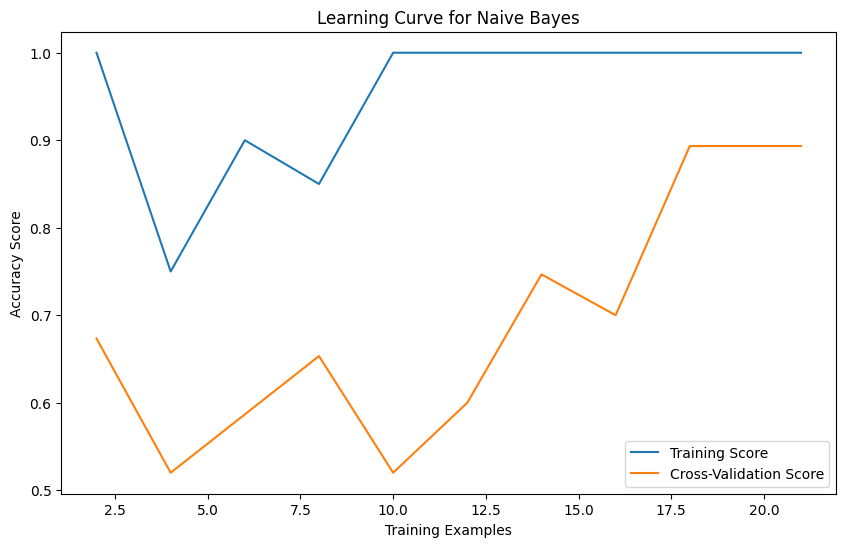

In [10]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Naive Bayes')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [11]:
# Model Evaluation on Test Set
X_temp_resampled, y_temp_resampled = sampler.fit_resample(X_temp_tfidf, y_temp)
test_predictions = nb_model.predict(X_temp_resampled)
test_accuracy = accuracy_score(y_temp_resampled, test_predictions)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:\n", classification_report(y_temp_resampled, test_predictions))


Test Accuracy: 0.9642857142857143
Test Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.93      0.96        14
 non-medical       0.93      1.00      0.97        14

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



In [12]:
# Example of making predictions on Naive Bayes
new_data_extended = [
    "heart disease",
    "expression varies across cultures.",
    "New year in Ethiopia is good.",
    "my health is not good",
    "doctors support patient",
]

new_data_extended_tfidf = tfidf_vectorizer.transform(new_data_extended)
new_predictions_extended = nb_model.predict(new_data_extended_tfidf)

print("\nNaive Bayes Predictions :")
for text, prediction in zip(new_data_extended, new_predictions_extended):
    print(f"{text} - Predicted: {prediction}")



Naive Bayes Predictions :
heart disease - Predicted: medical
expression varies across cultures. - Predicted: non-medical
New year in Ethiopia is good. - Predicted: non-medical
my health is not good - Predicted: medical
doctors support patient - Predicted: medical


# Model training using LogisticRegression


In [14]:
## Model training using LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the cleaned dataset
df = pd.read_csv('medical_non_medical_dataset.csv')

# Check class distribution
print("Original Data Distribution:")
print(df['label'].value_counts())


Original Data Distribution:
non-medical    44
medical        44
Name: label, dtype: int64


In [15]:
# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label'], test_size=0.3, random_state=100)

# Further split X_temp and y_temp into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.4, random_state=100)

# Handle missing values in X_train, X_val, and X_test
X_train = X_train.fillna('')
X_val = X_val.fillna('')
X_temp = X_temp.fillna('')


In [16]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_temp_tfidf = tfidf_vectorizer.transform(X_temp)


In [17]:
# Resampling using SMOTE
sampler = SMOTE(sampling_strategy='auto', k_neighbors=min(5, len(y_train) - 1))
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_tfidf, y_train)


In [18]:
# Model Selection and Training (Logistic Regression)
model = LogisticRegression(random_state=100)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=100)

In [27]:
# Model Evaluation on Validation Set with Misclassification Analysis
val_predictions = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"\nValidation Accuracy: {val_accuracy}")
print("Validation Classification Report:\n", classification_report(y_val, val_predictions))


Validation Accuracy: 0.7272727272727273
Validation Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.57      0.73         7
 non-medical       0.57      1.00      0.73         4

    accuracy                           0.73        11
   macro avg       0.79      0.79      0.73        11
weighted avg       0.84      0.73      0.73        11



In [20]:
# Analyze Misclassifications on Validation Set
misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_val, val_predictions)) if true_label != pred_label]
misclassified_examples = X_val.iloc[misclassified_indices].tolist()
true_labels = y_val.iloc[misclassified_indices].tolist()
pred_labels = val_predictions[misclassified_indices]

# print("\nMisclassified Examples on Validation Set:")
# for text, true_label, pred_label in zip(misclassified_examples, true_labels, pred_labels):
#     print(f"Text: {text} - True Label: {true_label} - Predicted Label: {pred_label}")

In [21]:
# Learning Curve for Overfitting/Underfitting Check
train_sizes, train_scores, test_scores = learning_curve(nb_model, X_temp_tfidf, y_temp, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')


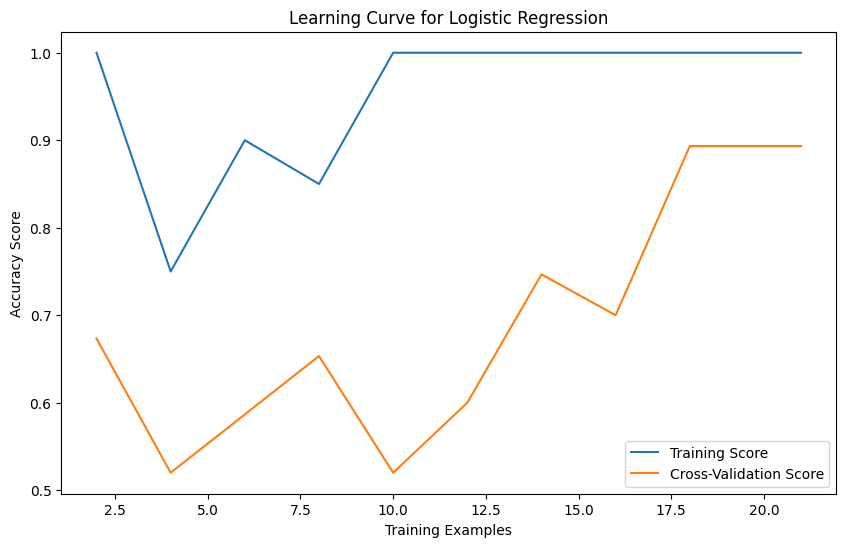

In [28]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [23]:
# Model Evaluation on Test Set
X_temp_resampled, y_temp_resampled = sampler.fit_resample(X_temp_tfidf, y_temp)
test_predictions = nb_model.predict(X_temp_resampled)
test_accuracy = accuracy_score(y_temp_resampled, test_predictions)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:\n", classification_report(y_temp_resampled, test_predictions))


Test Accuracy: 0.9642857142857143
Test Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.93      0.96        14
 non-medical       0.93      1.00      0.97        14

    accuracy                           0.96        28
   macro avg       0.97      0.96      0.96        28
weighted avg       0.97      0.96      0.96        28



In [24]:
# Example of making predictions on more new data using Logistic Regression
new_data_extended = [
    "heart disease",
    "expression varies across cultures.",
    "New year in Ethiopia is good."
]

new_data_extended_tfidf = tfidf_vectorizer.transform(new_data_extended)
new_predictions_extended = model.predict(new_data_extended_tfidf)

print("\nLogistic Regression Predictions on more new data:")
for text, prediction in zip(new_data_extended, new_predictions_extended):
    print(f"{text} - Predicted: {prediction}")



Logistic Regression Predictions on more new data:
heart disease - Predicted: medical
expression varies across cultures. - Predicted: non-medical
New year in Ethiopia is good. - Predicted: non-medical
